# <div align = 'center'> Lectura 10 Series de Tiempo VI</div>
<div align = 'left'>
      <font color = 'black' size = 4>
        <strong>Ciencias Administrativas - Universidad Nacional Mayor de San Marcos <br>
        Econometría Financiera<br>
        Semestre 2021-I<br>
        Setiembre 2021<br>
        Profesor: Fritz Sierra Tintaya<br>
          </font>
        </div>
        
### Contenido
  <div align = 'left'>
      <font color = 'steelblue' size = 4>
        10.1 Introdcucción al Modelo autorregresivo integrado de media móvil (ARIMA)<br>
          10.2. ¿Qué significa p, d y q en el modelo ARIMA?<br>
          10.3. ¿Qué son los modelos AR y MA?<br>
          10.4. ¿Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA?<br>
          10.5. Cómo encontrar el orden del término AR (p)<br>
          10.6. Cómo encontrar el orden del término MA (q)<br>
          10.7. Cómo manejar si una serie de tiempo está ligeramente por debajo o por encima de la diferencia<br>
          10.8. Cómo construir el modelo ARIMA?<br>
          10.9. Cómo encontrar el modelo ARIMA óptimo manualmente usando la validación cruzada fuera de tiempo<br>
          10.10. Métricas de precisión para el pronóstico de series de tiempo<br>
          10.11. Cómo hacer Auto Arima Forecast en Python<br>
          10.12. Cómo interpretar las gráficas de residuos en el modelo ARIMA<br>
          </font>
        </div>

## 1. Introducción al Modelo de Autoregresivo Integrado de Media Móvil (ARIMA)

ARIMA, abreviatura significa ```Autorregresivo(AR) Integrado(I) de Media móvil(MA)``` es en realidad una clase de modelos que 'explica' una serie de tiempo determinada en función de sus propios valores pasados, es decir, sus propios retrasos y los errores de pronóstico retrasado, de modo que se puede utilizar la ecuación para pronosticar valores futuros.


* AR: Auto Regresión. Un modelo que utiliza la relación de dependencia entre una observación y un conjunto de observaciones pasadas.
* I: Integrado. El uso de diferencias de observación para hacer una serie estacionaria.
* MA: Media Móvil. Modelo que utiliza la dependencia entre una observación y el error residual de las medias móviles aplicadas a observaciones anteriores.

Cualquier serie de tiempo **no estacional** que muestre patrones y no sea un **ruido blanco** aleatorio se puede modelar con modelos ARIMA.

Un modelo ARIMA se caracteriza por 3 término: p, d, q

donde:


* p: es el orden del término AR
* d: el número de diferencias necesarias para que la serie de tiempo sea estacionaria.
* q: es el orden del término MA

Si una serie de tiempo tiene patrones estacionales, entonces necesita agregar términos estacionales y se convierte en ```SARIMA```, abreviatura de "Seasonal ARIMA"



## 2. ¿Qué significa p, d y q en el modelo ARIMA?

El primer paso para construir un modelo ARIMA es hacer que la serie temporal sea estacionaria .

¿Por qué?

Porque, el término ```Auto regresivo``` en ARIMA significa que es un modelo de regresión lineal que usa sus propios rezagos como predictores. Los modelos de regresión lineal, como sabe, funcionan mejor cuando los predictores no están correlacionados y son independientes entre sí.

Entonces, **¿cómo hacer estacionaria una serie?**

El enfoque bastante común es **diferenciarlo**. Es decir, restamos el valor anterior del valor actual. A veces, dependiendo de la complejidad de la serie, es posible que se necesite más de una diferenciación.

El valor de $d$ , por lo tanto, es el número mínimo de diferenciaciones necesarias para que la serie sea estacionaria. Y si la serie de tiempo ya es estacionaria, entonces $d=0$.

A continuación, ¿cuáles son los términos 'p' y 'q'?

$p$ es el orden del término ```Auto regresivo``` (AR). Se refiere al número de rezagos de $Y$ que se utilizarán como predictores. Y $q$ es el orden del término ```Media móvil``` (MA). Se refiere al número de errores de pronóstico retrasados que deben incluirse en el modelo ARIMA.


## 3. ¿Qué son los modelos AR yMA?

Entonces, ¿qué son los modelos AR y MA? ¿Cuál es la fórmula matemática real para los modelos AR y MA?

Un modelo auto regresivo puro (solo AR) es aquel en el que $Y_t$ depende solo de sus propios retrasos. Es decir, $Y_t$ es una función de los rezagos de $Y_t$.

$$ Y_t = \alpha + \beta_1Y_{t-1} + \beta_2Y_{t-2}+..+\beta_p Y_{t-p}+\epsilon_t$$

donde $Y_{t-1}$ es el rezago 1 de la serie, $\beta_1$ es el coeficiente de rezago 1 que estima el modelo y $\alpha$ es el término de intersección, también estimado por el modelo.

Del mismo modo, un modelo puro de media móvil (solo MA) es uno en el que $Y_t$ depende solo de los errores de pronóstico retrasados.

$$ Y_t = \alpha + \epsilon_t +\phi_1\epsilon_{t-1}+\phi_2\epsilon_{t-2}+..+\phi_q\epsilon_{t-q}$$

donde los términos de error son los errores de los modelos autorregresivos de los respectivos rezagos. Los errores $\epsilon_t$ y $\epsilon_{t-1}$ son los errores de las siguientes ecuaciones:

$$ Y_t = \beta_1Y_{t-1} + \beta_2Y_{t-2}+..+\beta_p Y_{t-p}+\epsilon_t$$
$$ Y_{t-1} = \beta_1Y_{t-2} + \beta_2Y_{t-3}+..+\beta_0 Y_{0}+\epsilon_{t-1}$$


Esos fueron los modelos **AR** y **MA** respectivamente.

Entonces, ¿cómo se ve la ecuación de un modelo ARIMA?

Un modelo ARIMA es uno en el que la serie de tiempo se diferencia al menos una vez para hacerlo estacionario y se combinan los términos AR y MA. Entonces la ecuación se convierte en:

$$ Y_t = \alpha+ \beta_1Y_{t-1} + \beta_2Y_{t-2}+..+\beta_p Y_{t-p}+\epsilon_t +\phi_1\epsilon_{t-1}+\phi_2\epsilon_{t-2}+..+\phi_q\epsilon_{t-q}$$

**Modelo ARIMA en palabras**

Predicción $Y_t$ = Constante + Combinación lineal Retrasos de $Y$ (hasta $q$ rezagos) + Combinación lineal de errores de pronóstico rezagados (hasta $q$ rezagos)

El objetivo, por tanto, es identificar los valores de $p$, $d$ y $q$. ¿Pero cómo?

Comencemos por encontrar la $d$.

## 4. ¿Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA?

El propósito de diferenciarlo para hacer estacionaria la serie de tiempo.

Pero debes tener cuidado de no diferenciar demasiado la serie. Porque, una serie sobrediferenciada aún puede ser estacionaria, lo que a su vez afectará los parámetros del modelo.

Entonces, ¿cómo determinar el orden correcto de diferenciación?

El orden correcto de diferenciación es la diferenciación mínima requerida para obtener una serie casi estacionaria que deambula alrededor de una media definida y la gráfica ACF llega a cero con bastante rapidez.

Si las autocorrelaciones son positivas para muchos rezagos (10 o más), entonces la serie necesita una mayor diferenciación. Por otro lado, si la autocorrelación de retardo 1 en sí es demasiado negativa, entonces la serie probablemente esté sobrediferenciada.

En el caso, no puede realmente decidir entre dos órdenes de diferenciación, luego vaya con el orden que dé la menor desviación estándar en la serie diferenciada.

Pasos:

* Primero, vamos a verificar si la serie está estacionaria usando la prueba ```Augmented Dickey Fuller()```, del paquete statsmodels.adfuller()

¿Por qué?

* Porque solo necesita diferenciar si la serie ```no es estacionaria```. De lo contrario, no se necesita diferenciación, es decir, $d = 0$.
* La hipótesis nula de la prueba ADF es que la serie de tiempo ```no es estacionaria```. Entonces, si el valor ```p``` de la prueba es menor que el nivel de significancia (0.05), entonces rechaza la hipótesis nula e infiere que la serie de tiempo es de hecho estacionaria.

Entonces, en nuestro caso, si ```P-Value> 0.05```, seguimos adelante con la búsqueda del orden de diferenciación.

<img src="1.png">




In [5]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


In [6]:
# Importar datos: uso de Internet por minuto
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df

#https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01288PM-PN01289PM/csv/2013-1/2016-9
# df = pd.read_csv('https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01205PM/csv/1994-1/2021-9', names=['value'], header=0)
# df

,value
0,88
1,84
2,85
3,85
4,84
...,...
95,222
96,228
97,226
98,222


Text(0.5, 1.0, 'Serie original')

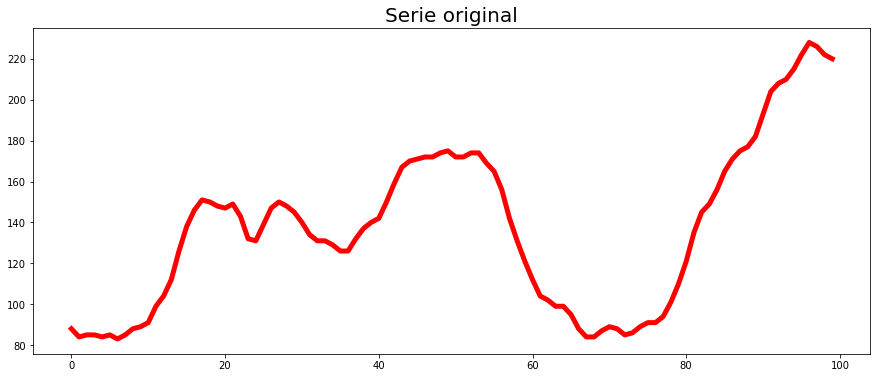

In [8]:
plt.figure(figsize=(15,6))
# Serie Original
plt.plot(df.value,lw=5, c='r')
plt.title("Serie original", fontsize=20)

Hacemos la prueba de ```Augmented Dickey Fuller()``` para proba estacionalidad

In [10]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419


Dado que el valor ```P-value = 0.124419``` es mayor que el nivel de significancia, tenemos que diferenciar la serie y veremos cómo se ve el gráfico de autocorrelación.

En esta ocaciòn haremos dos diferencias para revisar como nos da la autocorrelación y luego volver a realizar la **Prueba Dickey-Fuller**

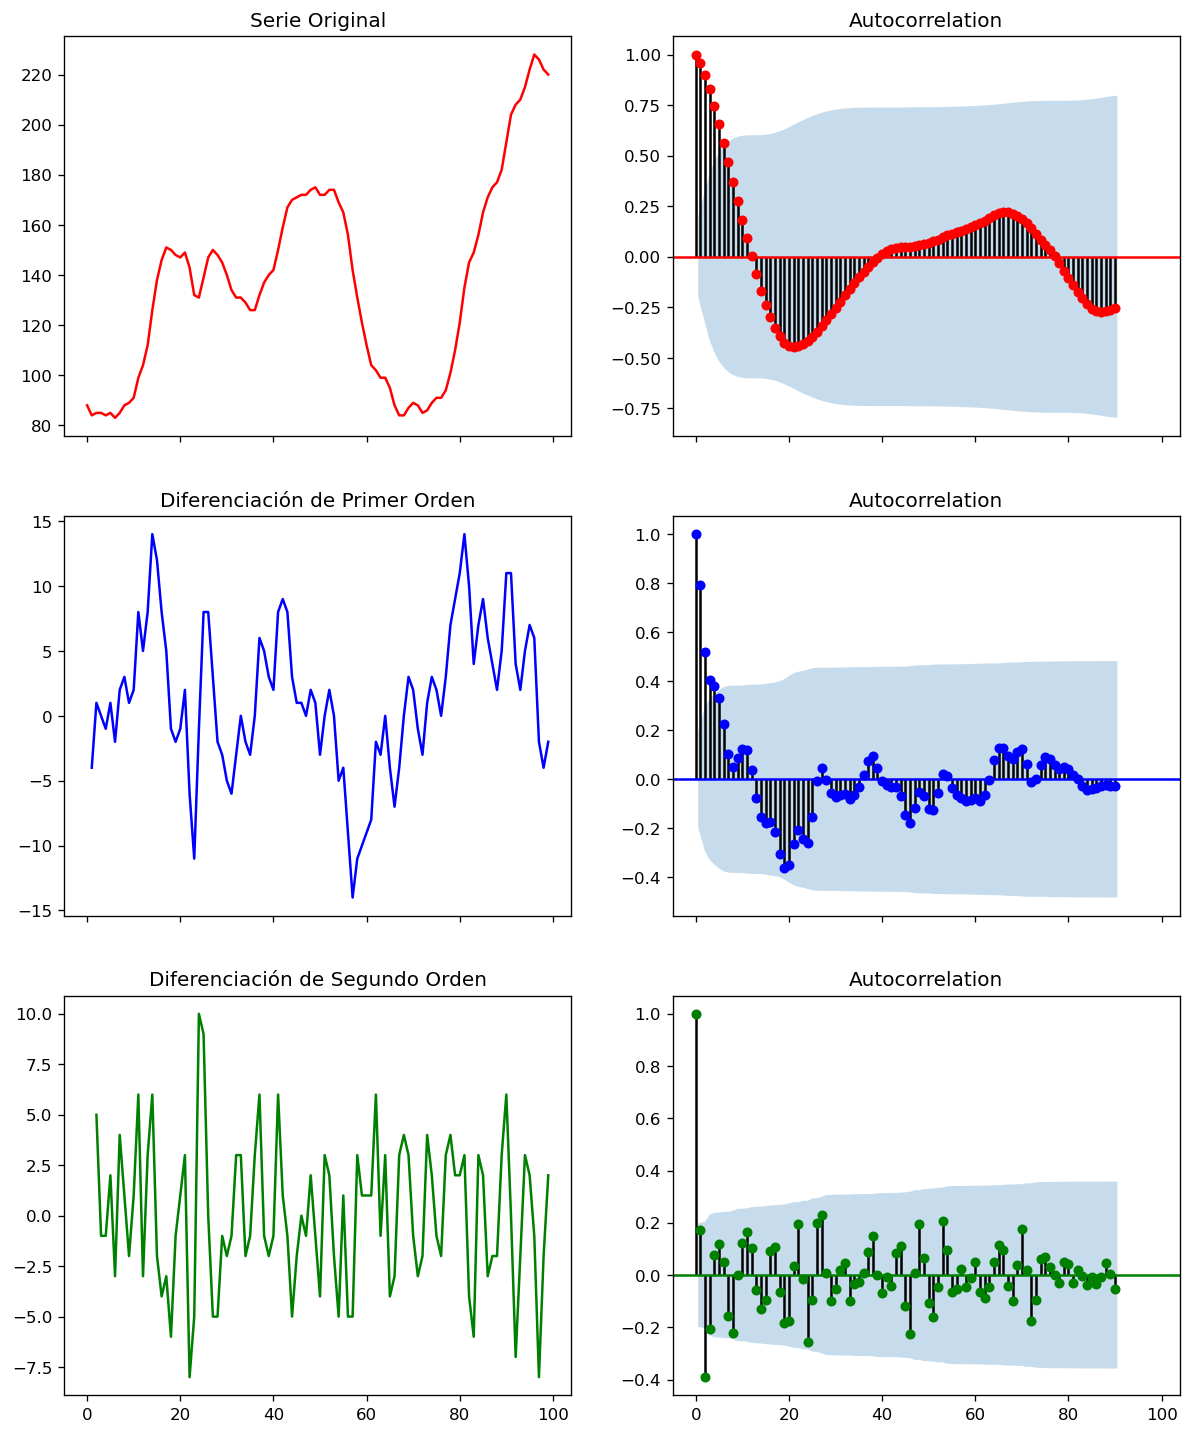

In [16]:
plt.rcParams.update({'figure.figsize':(12,15), 'figure.dpi':120})
# Serie Original
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value, c='r'); axes[0, 0].set_title('Serie Original')
plot_acf(df.value, ax=axes[0, 1], lags=90, c='r')

# 1ra Diferencia
axes[1, 0].plot(df.value.diff(), c='b'); axes[1, 0].set_title('Diferenciación de Primer Orden')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1], lags=90, c='b')

# 2nda Diferencia
axes[2, 0].plot(df.value.diff().diff(), c='g'); axes[2, 0].set_title('Diferenciación de Segundo Orden')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1], lags=90, c='g')

plt.show()

Para la serie anterior, la serie temporal alcanza la estacionariedad con dos órdenes de diferenciación. Pero al mirar el gráfico de autocorrelación para la segunda diferenciación, el retraso entra en la zona negativa lejana bastante rápido, lo que indica que la serie podría haber sido sobrediferenciada.

Por lo tanto, voy a fijar provisionalmente el orden de diferenciación como 1 aunque la serie no sea perfectamente estacionaria (estacionariedad débil).

Ahora probaremos nuevamente la prueba Dickey-Fuller para la primera diferenciación

In [18]:
#Segunda prueba con los datos diferenciados1 vez
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df.value.diff().dropna())
print('1ra Diferencia')
print('ADF Statistic: %f' % resultado[0])
print('p-value: %f' % resultado[1])

1ra Diferencia
ADF Statistic: -2.722238
p-value: 0.070268


In [19]:
#Tercera prueba con los datos diferenciados 2 veces
from statsmodels.tsa.stattools import adfuller
resultado = adfuller(df.value.diff().diff().dropna())
print('1ra Diferencia')
print('ADF Statistic: %f' % resultado[0])
print('p-value: %f' % resultado[1])

1ra Diferencia
ADF Statistic: -9.929762
p-value: 0.000000


El valor de $d=2$

## 5. Cómo encontrar el orden del término AR (p)

El siguiente paso es identificar si el modelo necesita algún término de ```AR```. Puede averiguar el número requerido de términos ```AR``` inspeccionando el gráfico de Autocorrelación parcial ```(PACF)```.

Pero, ¿qué es ```PACF```?

La autocorrelación parcial se puede imaginar como la correlación entre la serie y su rezago, después de excluir las contribuciones de los rezagos intermedios. Entonces, ```PACF``` transmite la correlación pura entre un retraso y la serie. De esa manera, sabrá si ese retraso es necesario en el plazo de ```AR``` o no.

Entonces, ¿cuál es matemáticamente la fórmula para ```PACF```?

La autocorrelación parcial del rezago ```(k)``` de una serie es el coeficiente de ese rezago en la ecuación de autorregresión de ```Y```.

$$Y_t=\alpha_0+\alpha_1Y_{t-1}+\alpha_2Y_{t-2}+\alpha_3Y_{t-3}$$

Es decir, suponga que si $Y_t$ es la serie actual y $Y_{t-1}$ es el rezago 1 de $Y$ , entonces la autocorrelación parcial del rezago 3 ($Y_{t-3}$) es el coeficiente $ \alpha_3$ de $Y_{t-3}$ en la ecuación anterior.

Bueno. Ahora, ¿cómo encontrar el número de términos AR?

Cualquier autocorrelación en una serie estacionaria se puede rectificar agregando suficientes términos AR. Entonces, inicialmente tomamos el orden del término AR como igual a tantos rezagos que cruzan el límite de significancia en la gráfica PACF.

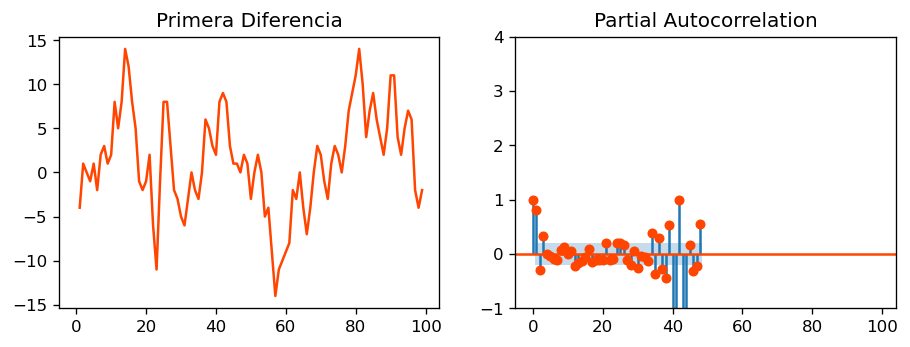

In [9]:
# Gráfico PACF de la  1st diferencia de la serie
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff().dropna(), c='orangered'); axes[0].set_title('Primera Diferencia')
axes[1].set(ylim=(-1,4))
plot_pacf(df.value.diff().dropna(), c='orangered',ax=axes[1], lags=48)

plt.show()

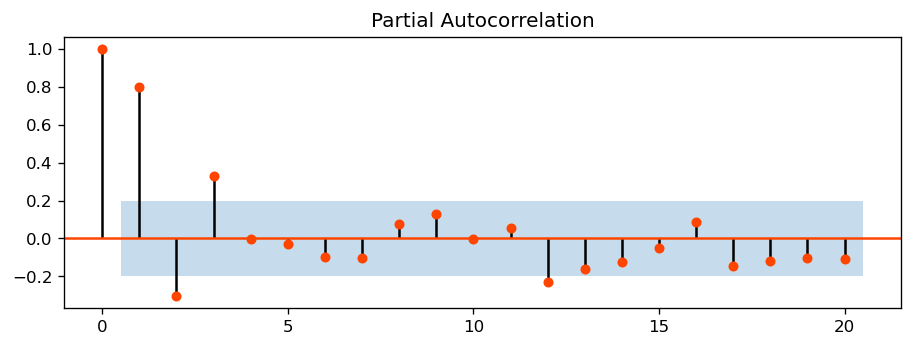

In [43]:
plot_pacf(df.value.diff().dropna(), c='orangered')
plt.show()

Puede observar que el retardo 1 de PACF es bastante significativo ya que está muy por encima de la línea de significación. El retardo 2 también resulta significativo, logrando cruzar levemente el límite de significancia (región azul). Pero vamos a ser conservador y tentativamente fijaremos la $p$ como 1.

## 6. Cómo encontrar el orden del término MA (q)

De la misma forma que observamos el gráfico PACF para el número de términos ```AR```, puede mirar el gráfico ```ACF``` para el número de términos ```MA```. Un término ```MA``` es técnicamente el error del pronóstico retrasado.

El ```ACF``` indica cuántos términos ```MA``` se requieren para eliminar cualquier autocorrelación en la serie estacionarizada.

Veamos el gráfico de autocorrelación de la serie diferenciada.

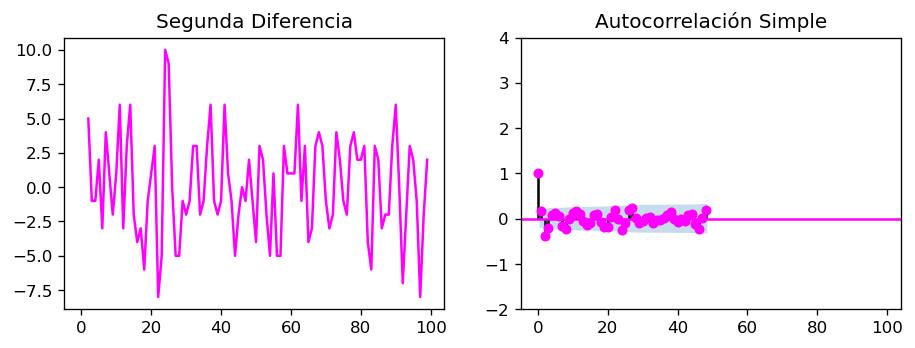

In [58]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff().diff().dropna(), color='fuchsia'); axes[0].set_title('Segunda Diferencia')
axes[1].set(ylim=(-2,4))
plot_acf(df.value.diff().diff().dropna(), ax=axes[1], lags=48, color='fuchsia')
plt.title('Autocorrelación Simple')
plt.show()

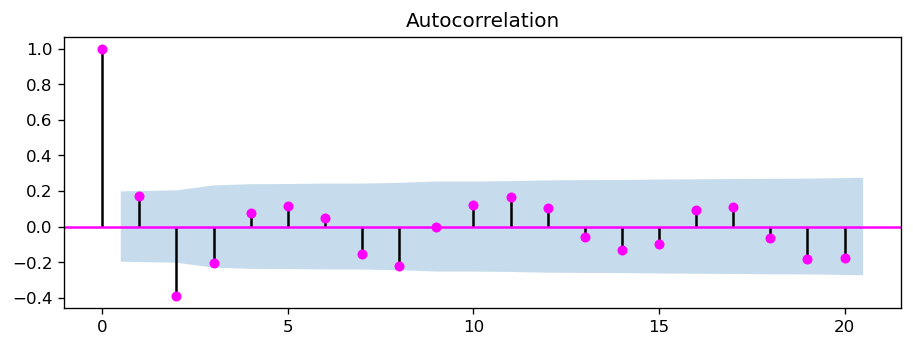

In [59]:
plot_acf(df.value.diff().diff().dropna(), c='fuchsia')
plt.show()

Un par de retrasos están muy por encima de la línea de importancia. Entonces, fijemos tentativamente $q$ como 2. En caso de duda, opte por el modelo más simple que explique suficientemente el comportamiento de  $Y$.

## 7. Cómo manejar si una serie de tiempo está ligeramente por debajo o por encima de la diferencia

Puede suceder que su serie esté ligeramente subdiferenciada, que diferenciarla una vez más la haga ligeramente sobrediferenciada.

¿Cómo manejar este caso?

Si su serie está ligeramente por debajo de la diferencia, agregar uno o más términos AR adicionales generalmente lo compensa. Del mismo modo, si está ligeramente sobrediferenciado, intente agregar un término MA adicional.

## 8. ¿Cómo construir el modelo ARIMA?
Ahora que ha determinado los valores de p, d y q, tiene todo lo necesario para ajustarse al modelo ARIMA. Usemos la implementación ```ARIMA()``` de ```statsmodels```

In [60]:
from statsmodels.tsa.arima_model import ARIMA

#Modelo ARIMA 1,2,1
model = ARIMA(df.value, order=(1,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   98
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -258.793
Method:                       css-mle   S.D. of innovations              3.390
Date:                Wed, 01 Sep 2021   AIC                            525.586
Time:                        17:17:35   BIC                            535.926
Sample:                             2   HQIC                           529.769
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0332      0.436      0.076      0.939      -0.821       0.887
ar.L1.D2.value    -0.2660      0.182     -1.462      0.144      -0.623       0.091
ma.L1.D2.value     0.6138      0.137

El resumen del modelo revela mucha información. La tabla en el medio es la tabla de coeficientes donde los valores debajo de 'coef' son los pesos de los términos respectivos.

Observe aquí que el coeficiente del término $MA1$ es diferente de cero y el valor P en $'P> | z |'$ columna es muy significativo. Idealmente, es menor que 0.05 para que la $X$ respectiva sea significativa.

In [62]:
#Modelo ARIMA 1,1,2
model = ARIMA(df.value, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Wed, 01 Sep 2021   AIC                            517.579
Time:                        17:24:15   BIC                            530.555
Sample:                             1   HQIC                           522.829
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1202      1.290      0.868      0.385      -1.409       3.649
ar.L1.D.value     0.6351      0.257      2.469      0.014       0.131       1.139
ma.L1.D.value     0.5287      0.355     

In [63]:
#Modelo ARIMA 1,1,1
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.790
Method:                       css-mle   S.D. of innovations              3.119
Date:                Wed, 01 Sep 2021   AIC                            515.579
Time:                        17:26:27   BIC                            525.960
Sample:                             1   HQIC                           519.779
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1205      1.286      0.871      0.384      -1.400       3.641
ar.L1.D.value     0.6344      0.087      7.317      0.000       0.464       0.804
ma.L1.D.value     0.5297      0.089     

En este último modelo ```AIC``` se ha reducido, lo cual es bueno. Los valores ```P``` de los términos AR1 y MA1 han mejorado y son altamente significativos (<< 0.05).

Grafiquemos los residuos para asegurarnos de que no haya patrones (es decir, busquemos la media y la varianza constantes)

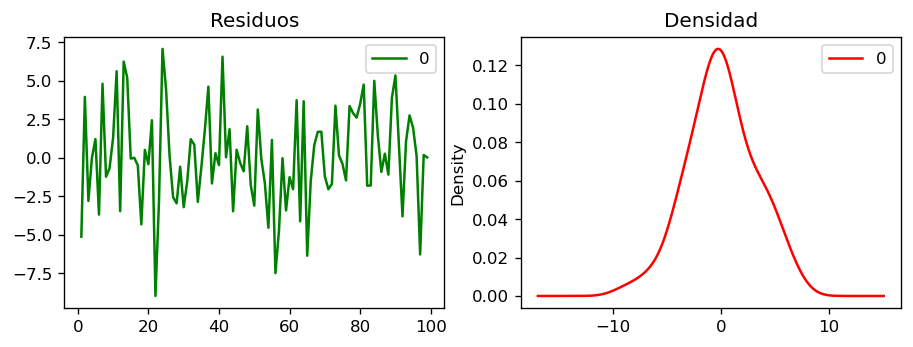

In [68]:
# Grpafico de los Residuos
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuos", ax=ax[0], color='g')
residuals.plot(kind='kde', title='Densidad', ax=ax[1], color='red')
plt.show()

Los errores residuales parecen estar bien con una media cercana a cero y una varianza uniforme. Grafiquemos los valores reales contra los valores ajustados usando ```plot_predict()```

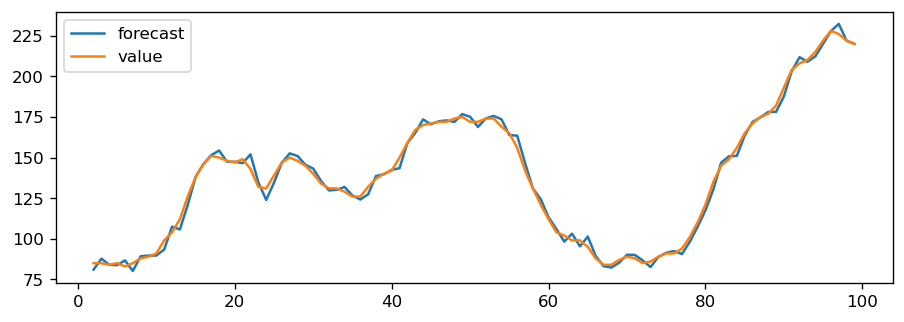

In [69]:
# Actual vs Ajustado
model_fit.plot_predict(dynamic=False)
plt.show()

Cuando establece, los valores rezagados en la muestra se utilizan para la predicción.dynamic=False

Es decir, el modelo se entrena hasta el valor anterior para realizar la próxima predicción. Esto puede hacer que el pronóstico ajustado y los datos reales se vean artificialmente bien.

Entonces, parece que tenemos un modelo ARIMA decente. ¿Pero es eso lo mejor?

No puedo decir eso en este momento porque en realidad no hemos pronosticado el futuro ni hemos comparado el pronóstico con el rendimiento real.

Por lo tanto, la validación real que necesita ahora es la validación cruzada fuera de tiempo

## 9. Cómo encontrar el modelo ARIMA óptimo manualmente usando la validación cruzada fuera de tiempo

En la validación cruzada fuera de tiempo, retrocede unos pocos pasos en el tiempo y pronostica en el futuro tantos pasos hacia atrás. Luego, compara el pronóstico con los datos reales.

Para realizar una validación cruzada fuera de tiempo, debe crear el conjunto de datos de entrenamiento y prueba o test dividiendo la serie de tiempo en 2 partes contiguas en una proporción de aproximadamente 75:25 o una proporción razonable basada en la frecuencia de tiempo de la serie.

¿Por qué no estoy muestreando los datos de entrenamiento al azar?

Esto se debe a que la secuencia de orden de la serie de tiempo debe estar intacta para poder usarla para pronosticar.

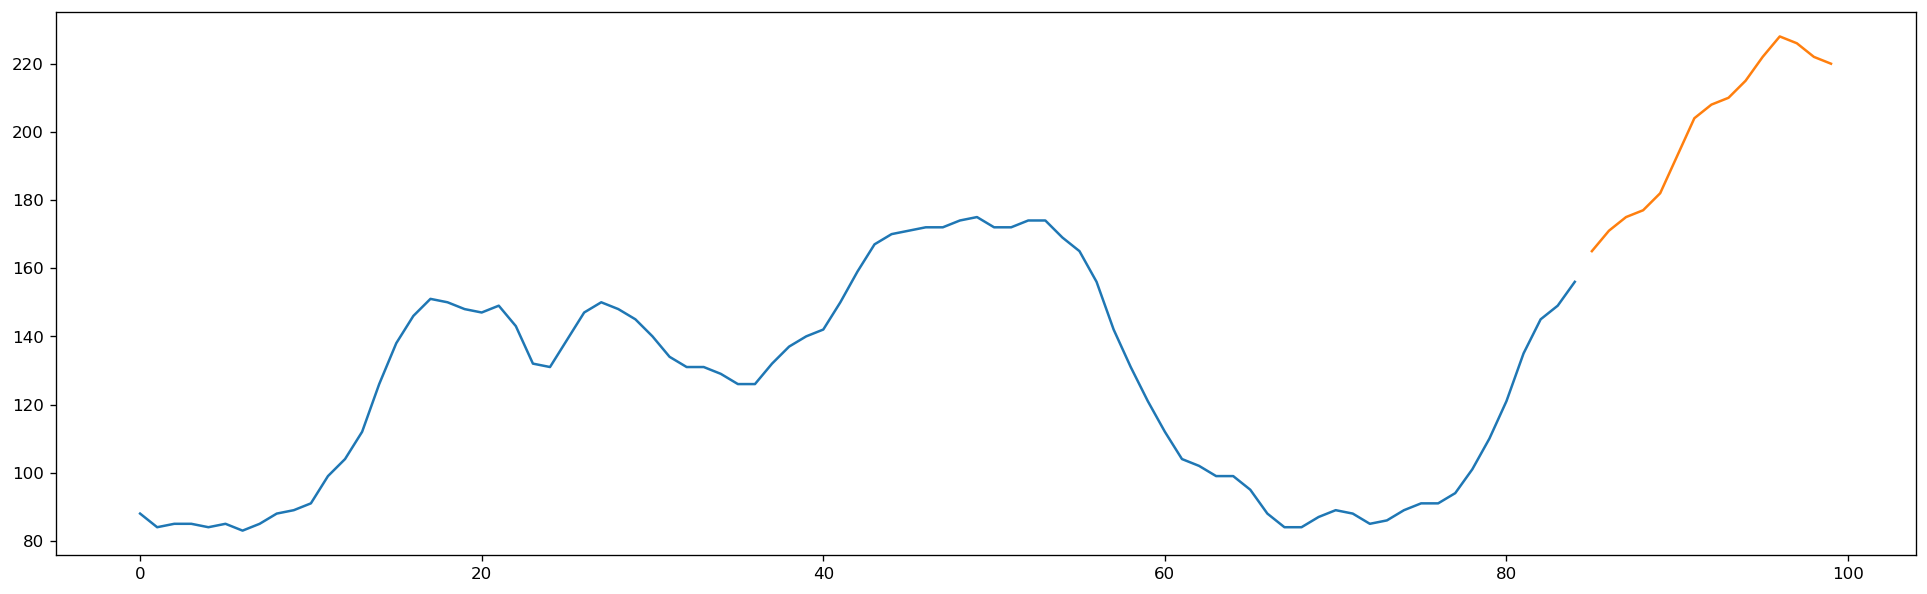

In [74]:
# Creando la serie de Entrenamiento y Test

# n = int(len(df.value) * 2/3)
# train = df.value[:n]
# test = df.value[n:]

train = df.value[:85]
test = df.value[85:]

plt.figure(figsize=(20, 6))
plt.plot(train)
plt.plot(test)





Ahora podemos construir el modelo ARIMA en el conjunto de datos de entrenamiento, pronosticarlo y trazarlo.

In [77]:
# Modelo de Entrenamiento
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

In [83]:
# Pronóstico
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf



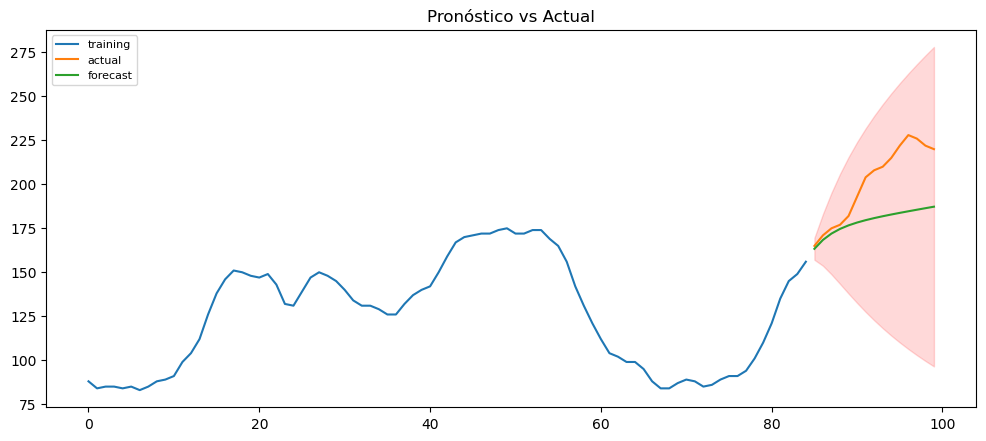

In [82]:
# Creando Series con Pandas
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='r', alpha=.15)
plt.title('Pronóstico vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

A partir del gráfico, el modelo ARIMA (1,1,1) parece dar un pronóstico direccionalmente correcto. Y los valores reales observados se encuentran dentro de la banda de confianza del 95%. Eso parece estar bien.

Pero cada uno de los pronósticos previstos está consistentemente por debajo de los reales. Eso significa que, al agregar una pequeña constante a nuestro pronóstico, la precisión ciertamente mejorará. Por lo tanto, definitivamente hay margen de mejora.

Entonces, lo que vamos a hacer es aumentar el orden de diferenciación a dos, que se establece y aumentar iterativamente p hasta 5 y luego q hasta 5 para ver qué modelo da menos AIC y también buscar un gráfico que dé datos reales y pronósticos más cercanos.d=2

Mientras hacemos esto, vigilamos los valores P de los términos AR y MA en el resumen del modelo. Deben estar tan cerca de cero, idealmente, menos de 0.05.

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.248
Method:                       css-mle   S.D. of innovations              3.153
Date:                Wed, 01 Sep 2021   AIC                            440.497
Time:                        17:46:54   BIC                            455.010
Sample:                             2   HQIC                           446.327
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0483      0.084      0.577      0.564      -0.116       0.212
ar.L1.D2.value     1.1386      0.109     10.399      0.000       0.924       1.353
ar.L2.D2.value    -0.5923      0.155

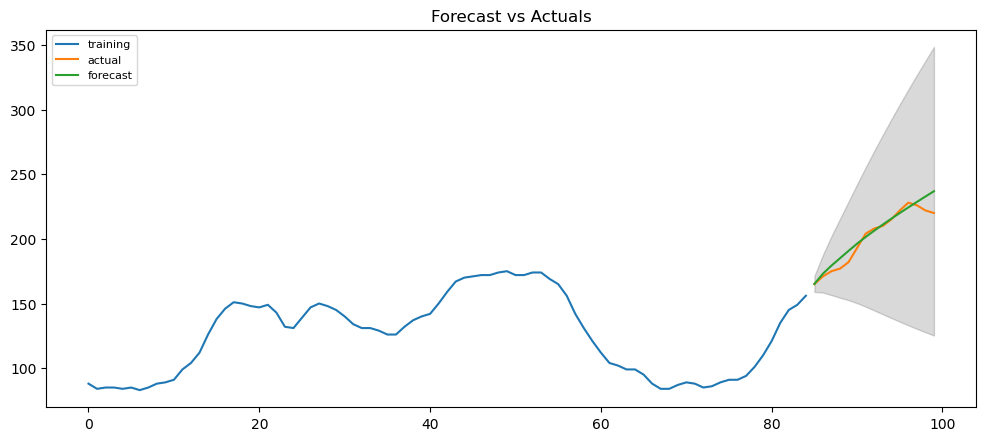

In [84]:
# Construcción del Modelos
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Creando Series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

El AIC se ha reducido de 515 a 440. Bien. Los valores P de los términos X son menos <0.05, lo cual es genial.

Entonces, en general, es mucho mejor.

Idealmente, debería retroceder varios puntos en el tiempo, por ejemplo, retroceder 1, 2, 3 y 4 trimestres y ver cómo se están desempeñando sus pronósticos en varios puntos del año.


## 10. Métricas de precisión para el pronóstico de series de tiempo

Las métricas de precisión comúnmente utilizadas para juzgar los pronósticos son:

* Error de porcentaje absoluto medio (MAPE)
* Error medio (ME)
* Error absoluto medio (MAE)
* Error de porcentaje medio (MPE)
* Error cuadrático medio (RMSE)
* Autocorrelación de error con retraso 1 (ACF1)
* Correlación entre lo real y lo pronosticado (corr)
* Error mínimo-máximo (minmax)

Por lo general, si está comparando pronósticos de dos series diferentes, se pueden usar MAPE, Correlación y Error Mín-Máx.

¿Por qué no utilizar las otras métricas?

Debido a que solo los tres anteriores son errores porcentuales que varían entre 0 y 1. De esa manera, puede juzgar qué tan bueno es el pronóstico independientemente de la escala de la serie.

Las otras métricas de error son cantidades. Eso implica que un RMSE de 100 para una serie cuya media está en 1000 es mejor que un RMSE de 5 para una serie en decenas. Por lo tanto, realmente no puede usarlos para comparar los pronósticos de dos series de tiempo escaladas diferentes.

In [87]:
# Métricas
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.022501251196965742,
 'me': 3.2307466983869877,
 'mae': 4.548309252188537,
 'mpe': 0.016420831904857585,
 'rmse': 6.373214736868612,
 'acf1': 0.5105513014456228,
 'corr': 0.9674576675952428,
 'minmax': 0.021631492713192535}

Alrededor del 2,2% de MAPE implica que el modelo tiene una precisión de aproximadamente un 97,8% en la predicción de las próximas 15 observaciones.


Ahora sabe cómo construir un modelo ARIMA manualmente.

Pero en situaciones reales, se le proporcionará una gran cantidad de series de tiempo para pronosticar y el ejercicio de pronóstico se repetirá con regularidad.

Por tanto, necesitamos una forma de automatizar el mejor proceso de selección de modelos

## 11. Cómo hacer Auto Arima Forecast en Python

Al igual que la función popular de R , el paquete proporciona una funcionalidad similar ```.auto.arima()```.

```auto_arima()```utiliza un enfoque paso a paso para buscar múltiples combinaciones de parámetros p, d, q y elige el mejor modelo que tiene el menor AIC

Se necesita instalar la libreria ```pmdarima```

In [12]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # usamos el test adf para el óptimo valor de 'd'
                      max_p=3, max_q=3, # máximo p y q
                      m=1,              # frecuencia de la serie
                      d=None,           # dejar que el modelo determine 'd'
                      seasonal=False,   # sin estacionalidad
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

## 12. Cómo interpretar las gráficas de residuos en el modelo ARIMA

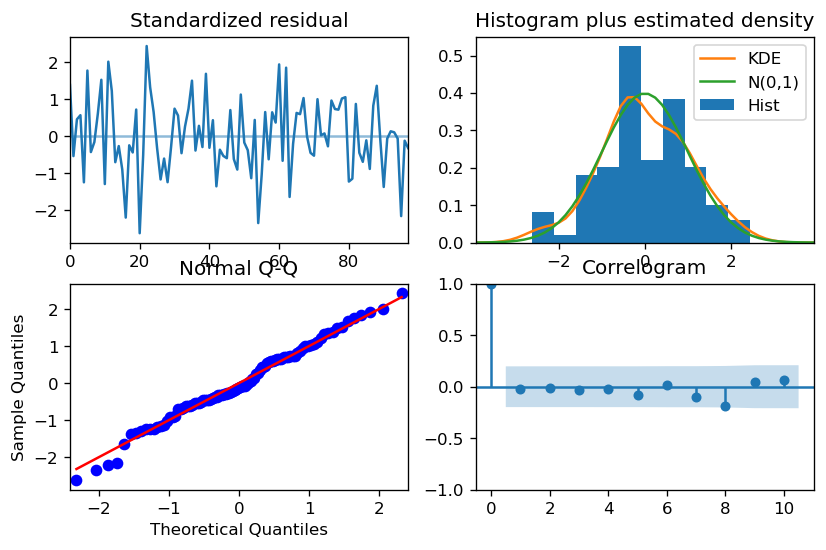

In [14]:
model.plot_diagnostics(figsize=(8,5))
plt.show()

Entonces, ¿cómo interpretar los diagnósticos de la trama?

* Arriba a la izquierda: los errores residuales parecen fluctuar alrededor de una media de cero y tienen una varianza uniforme.

* Arriba a la derecha: la gráfica de densidad sugiere una distribución normal con media cero.

* Abajo a la izquierda: todos los puntos deben estar perfectamente alineados con la línea roja. Cualquier desviación significativa implicaría que la distribución está sesgada.

* Abajo a la derecha: el correlograma, también conocido como gráfico ACF, muestra que los errores residuales no están autocorrelacionados. Cualquier autocorrelación implicaría que existe algún patrón en los errores residuales que no se explican en el modelo. Por lo tanto, deberá buscar más X (predictores) en el modelo.

En general, parece encajar bien. Pronostiquemos.

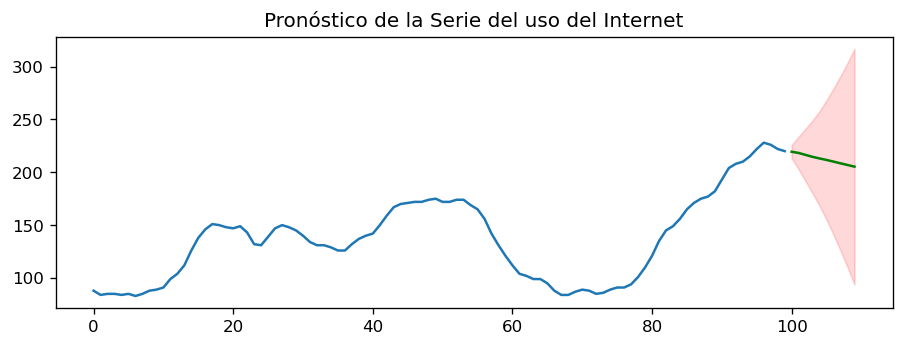

In [16]:
# Pronóstico
nperiods = 10
fc, confint = model.predict(n_periods=nperiods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+nperiods)

# Creando Series
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='green')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='r', alpha=.15)

plt.title("Pronóstico de la Serie del uso del Internet")
plt.show()

# fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# # Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
# plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()